In [21]:
!pip install numpy 
!pip install pandas 
!pip install tensorflow
!pip install matplotlib
!pip install keras
!pip install keras

In [17]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/06/15/e73734f9170b66c6a84a0bd7e03586e87e77404e2eb8e34749fc49fa43f7/scipy-1.11.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     -------------------------------------- 59.1/59.1 kB 626.5 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f72

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
#
data=pd.read_csv(r"C:\Users\Aayushi\Downloads\STOCK-PREDICTION-USING-LSTM-main\STOCK-PREDICTION-USING-LSTM-main\stock.csv")

In [ ]:
data.info()

In [ ]:
data.head()

In [32]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7160 non-null   object 
 1   Open       7160 non-null   float64
 2   High       7160 non-null   float64
 3   Low        7160 non-null   float64
 4   Close      7160 non-null   float64
 5   Adj Close  7160 non-null   float64
 6   Volume     7160 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 391.7+ KB


In [ ]:
#fit_transform is used to transform the values 
#rescaling data using min max scaler function to give range

In [33]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(7160, 1)

In [ ]:
#here we used the time steps and length of data

In [36]:
X_train=[]
Y_train=[]

for i in range (60,1149):
    X_train.append(trainData[i-60:i,0])
    Y_train.append(trainData[i,0])

X_train,Y_train=np.array(X_train),np.array(Y_train)
    
    

In [37]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [ ]:
#building model with 4layers using LSTM all followed by dropout layer
#on top a dense layer
#all compiled using adam optimizer and meansquared error as loss function

In [38]:
model=Sequential()
model.add(LSTM(units=100,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss="mean_squared_error")




In [ ]:
#training data using model.fit function with epochs=20 and batch size 32

In [39]:
hist=model.fit(X_train,Y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
35/35 - 29s - loss: 5.0012e-05 - 29s/epoch - 839ms/step
Epoch 2/20
35/35 - 7s - loss: 1.9881e-05 - 7s/epoch - 211ms/step
Epoch 3/20
35/35 - 7s - loss: 6.8332e-06 - 7s/epoch - 213ms/step
Epoch 4/20
35/35 - 7s - loss: 3.4691e-06 - 7s/epoch - 209ms/step
Epoch 5/20
35/35 - 7s - loss: 2.4191e-06 - 7s/epoch - 196ms/step
Epoch 6/20
35/35 - 7s - loss: 2.4206e-06 - 7s/epoch - 198ms/step
Epoch 7/20
35/35 - 7s - loss: 4.7935e-06 - 7s/epoch - 201ms/step
Epoch 8/20
35/35 - 7s - loss: 4.6256e-06 - 7s/epoch - 203ms/step
Epoch 9/20
35/35 - 7s - loss: 3.1037e-06 - 7s/epoch - 201ms/step
Epoch 10/20
35/35 - 7s - loss: 2.1441e-06 - 7s/epoch - 210ms/step
Epoch 11/20
35/35 - 7s - loss: 1.9405e-06 - 7s/epoch - 205ms/step
Epoch 12/20
35/35 - 7s - loss: 3.0003e-06 - 7s/epoch - 206ms/step
Epoch 13/20
35/35 - 7s - loss: 2.5031e-06 - 7s/epoch - 210ms/step
Epoch 14/20
35/35 - 7s - loss: 2.1903e-06 - 7s/epoch - 196ms/step
Epoch 15/20
35/35 - 7s - loss: 2.1119e-06 - 7s/epoch - 199ms/step
Epoch 16/20
35/35

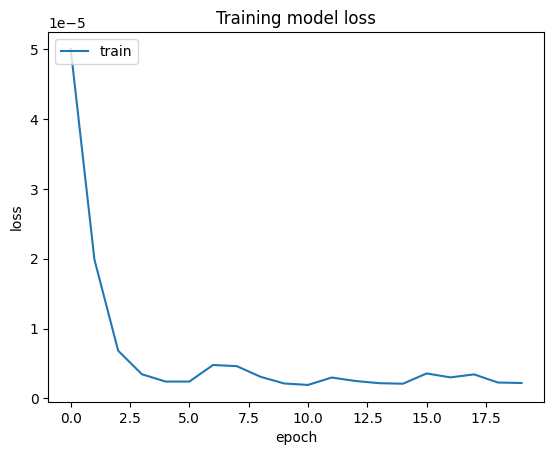

In [40]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [44]:
#
testData=pd.read_csv(r"C:\Users\Aayushi\Downloads\STOCK-PREDICTION-USING-LSTM-main\STOCK-PREDICTION-USING-LSTM-main\stock.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData=testData.dropna()
testData=testData.iloc[:,4:5]
Y_test=testData.iloc[60:,0:].values
#VALUES 
inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length = len(testData)
time=60
for i in range(time,length):
    X_test.append(inputClosing_scaled[i-time:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(7100, 60, 1)

In [45]:
y_pred=model.predict(X_test)
y_pred

222/222 [==============================] - 18s 67ms/step


array([[1.6295072e-04],
       [1.0730792e-04],
       [3.4639146e-05],
       ...,
       [5.5132192e-01],
       [5.5237097e-01],
       [5.5338854e-01]], dtype=float32)

In [46]:
predicted_price=sc.inverse_transform(y_pred)

In [47]:
#finally plotting the stock prediction graph

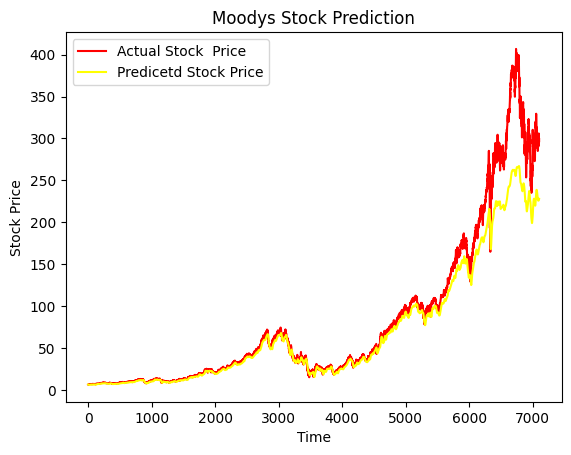

In [48]:
plt.plot(Y_test,color='red',label='Actual Stock  Price')
plt.plot(predicted_price,color='yellow',label='Predicetd Stock Price')
plt.title('Moodys Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()